In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting


pd.set_option('display.float_format', '{:,.0f}'.format)

ticker = "UPST".upper()
period = "10y"
stock = yf.Ticker(ticker)
history = stock.history(period=period)

/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [4]:
history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,800,800,800,800,800,800,800
mean,79,83,76,79,"7,140,142",0,0
std,80,83,77,80,"5,455,917",0,0
min,12,13,12,12,"542,300",0,0
25%,25,26,24,25,"3,836,825",0,0
50%,39,41,37,39,"5,915,850",0,0
75%,114,121,109,115,"8,763,850",0,0
max,388,401,381,390,"68,822,500",0,0


In [5]:
stock.cash_flow

,2022-12-31,2021-12-31,2020-12-31
Free Cash Flow,"-697,594,000","153,238,000","10,092,000"
Repurchase Of Capital Stock,"-177,883,000",0,0
Repayment Of Debt,"-400,898,000","-71,316,000","-174,239,000"
Issuance Of Debt,"688,813,000","718,422,000","92,057,000"
Issuance Of Capital Stock,0,"263,931,000","159,488,000"
Capital Expenditure,"-22,913,000","-15,115,000","-5,605,000"
Interest Paid Supplemental Data,"12,473,000","3,274,000","8,028,000"
Income Tax Paid Supplemental Data,"328,000","2,300,000",0
End Cash Position,"532,467,000","1,191,241,000","311,333,000"
Beginning Cash Position,"1,191,241,000","311,333,000","80,067,000"


In [6]:
stock.financials

,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,0,"-333,990",0
Tax Rate For Calcs,0,0,0
Total Unusual Items,0,"-1,237,000",0
Total Unusual Items Excluding Goodwill,0,"-1,237,000",0
Net Income From Continuing Operation Net Minority Interest,"-108,665,000","135,443,000","5,983,000"
Reconciled Depreciation,"13,513,000","7,541,000","2,278,000"
Net Interest Income,"94,737,000","17,360,000","18,382,000"
Interest Expense,"10,843,000","3,274,000","8,026,000"
Interest Income,"105,580,000","20,634,000","26,408,000"
Normalized Income,"-108,665,000","136,346,010","5,983,000"


In [7]:
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-16 00:00:00-05:00,26,30,23,29,13459800,0,0
2020-12-17 00:00:00-05:00,29,40,28,36,7042200,0,0
2020-12-18 00:00:00-05:00,38,49,37,44,7266500,0,0
2020-12-21 00:00:00-05:00,44,48,40,41,2833800,0,0
2020-12-22 00:00:00-05:00,43,48,41,48,3727400,0,0
...,...,...,...,...,...,...,...
2024-02-15 00:00:00-05:00,27,28,26,27,9448700,0,0
2024-02-16 00:00:00-05:00,27,28,26,26,9656900,0,0
2024-02-20 00:00:00-05:00,25,26,25,26,7274200,0,0


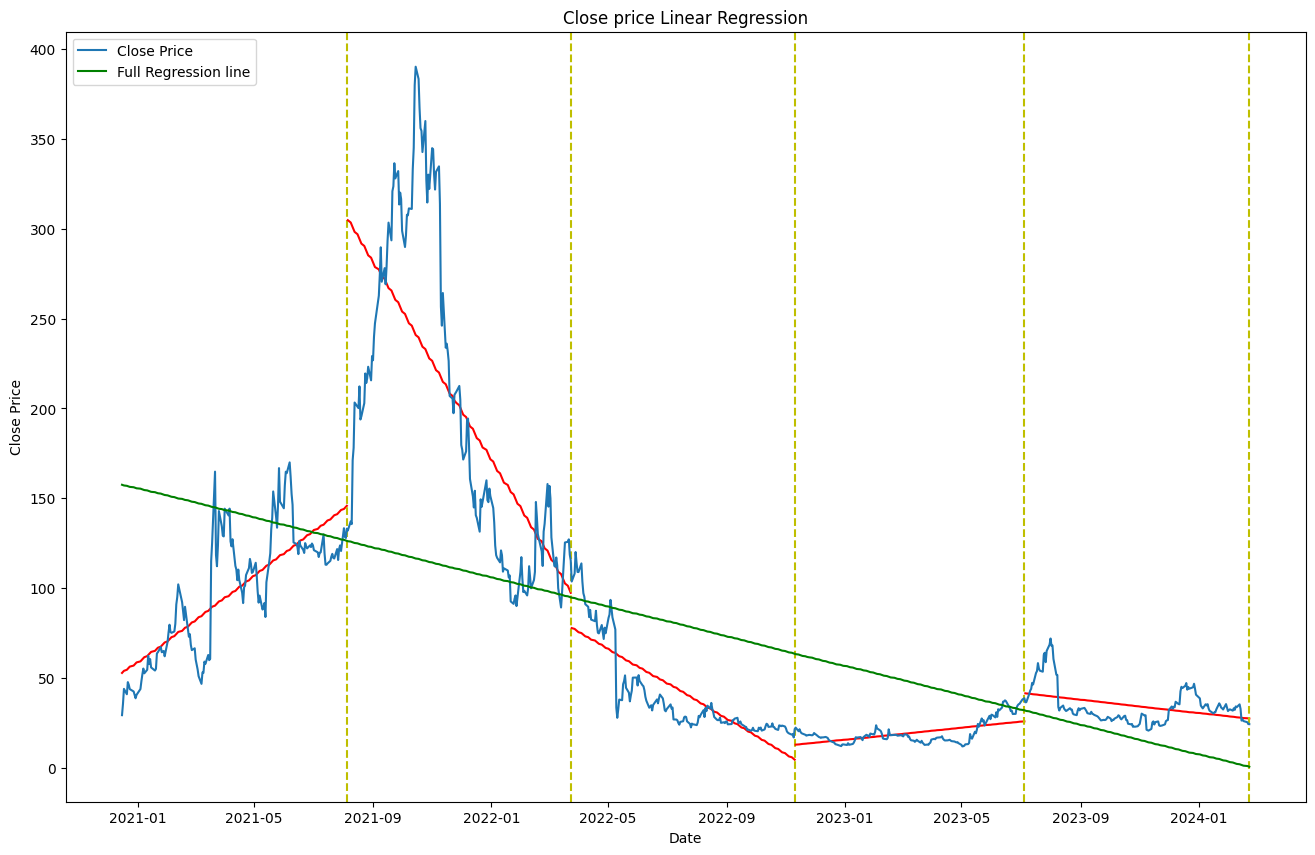

In [8]:
plotting.plot_regression_line(history, reg_line_count=5)

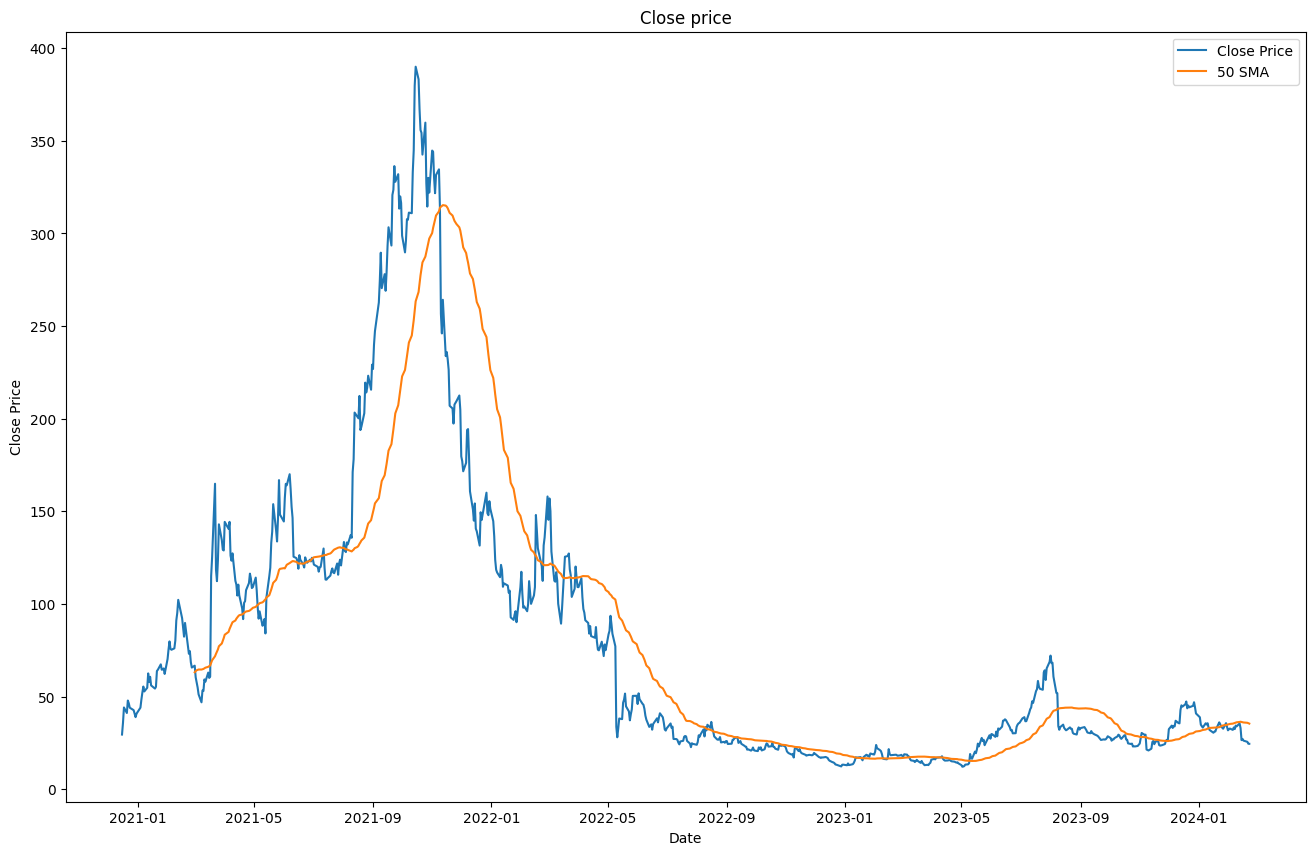

In [9]:
plotting.plot_sma(history, [50])

In [10]:
a = history['Close'] / history['Close'].shift(1)
a

Date
2020-12-16 00:00:00-05:00   NaN
2020-12-17 00:00:00-05:00     1
2020-12-18 00:00:00-05:00     1
2020-12-21 00:00:00-05:00     1
2020-12-22 00:00:00-05:00     1
                             ..
2024-02-15 00:00:00-05:00     1
2024-02-16 00:00:00-05:00     1
2024-02-20 00:00:00-05:00     1
2024-02-21 00:00:00-05:00     1
2024-02-22 00:00:00-05:00     1
Name: Close, Length: 800, dtype: float64